In [1]:
import numpy as np
import netCDF4 as nc
import os
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.gridspec as gridspec
import cartopy as crt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
import datetime as dt
from shapely import geometry
import sys
sys.path.insert(0, '/ocean/eolson/MEOPAR/northernNO3PaperCalcs/notebooks/')
#import NorthNut as nn
from salishsea_tools.places import PLACES
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
#mpl.rc('text', usetex=True)

#mpl.rc('text.latex', preamble = ','.join(r'''
# \usepackage{txfonts}
# \usepackage{lmodern}
# '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [3]:
# https://github.com/e-olson/NSOGNO3/blob/master/notebooks/MapForPaper.ipynb
# temp = nc.Dataset('..//..//data//basemap//BathSmooth_2km.nc')
# temp = nc.Dataset('..//..//data//basemap//BathSmooth_500m_May2020.nc')
# print(temp.variables)
# temp.close()

In [2]:
#with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
with nc.Dataset('..//..//data//basemap//BathSmooth_2km.nc') as mesh:
    navlon=mesh.variables['lon'][:]
    navlat=mesh.variables['lat'][:]
    bathy=mesh.variables['bathymetry'][:]
#     bathy=np.sum(mesh.variables['bathymetry'][0,:])#*mesh.variables['e3t_0'][0,:,:,:],0)

    tmask=mesh.variables['bathymetry'][:,:]

In [3]:
np.shape(tmask)
# tmask2=tmask[0,:]
# tmask[1:]=np.maximum(tmask[])
# bathy[100,100]
tmask.data == -10

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

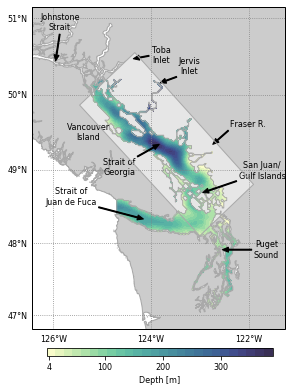

In [11]:
fig = plt.figure(figsize=(7.48,5.3))
#gs = gridspec.GridSpec(1,2,left=.1,right=.9,hspace=1,wspace=1,bottom=.1,top=.9)
gs = fig.add_gridspec(1,2,left=.1,right=.9,hspace=1,wspace=1,bottom=.1,top=.9)
cax = fig.add_axes([0.079, 0.075, 0.42, 0.02])
xlim,ylim=[-126.43,-121.25],[46.8,51.14]
ax0 = fig.add_axes([0.052, 0.104, 0.47, 0.925],projection=crt.crs.Mercator(np.mean(xlim), *ylim))
#ax1 = fig.add_axes([0.532, 0.01, 0.46, 0.98])
ax0.set_extent(xlim + ylim)
imap=True
if imap==True:
    ax0.add_feature(crt.feature.GSHHSFeature('full', edgecolor='darkgray', facecolor=(.8,.8,.8)))
#     verts=[[navlon[0,0]+.01,navlat[0,0]+.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])],
#            [navlon[0,-1]+.01,navlat[0,-1]+.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
#            [navlon[-1,-1]-.01,navlat[-1,-1]-.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
#            [navlon[-1,0]-.01,navlat[-1,0]]-.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])]
    verts=[[-125.46,49.86],[-124.33, 50.55],[-121.9,48.8], [-123, 48.1]]
    poly = geometry.polygon.Polygon(verts)     
    p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=(.9,.9,.9), edgecolor=None,
                         lw=1, zorder=1)
    p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=(.9,.9,.9), color='None', 
                         edgecolor="darkgray",lw=1, zorder=10)
    
#     gl = ax0.gridlines(crs=crt.crs.PlateCarree(), draw_labels=True,
#                   linewidth=1, color='gray', alpha=1, linestyle=':')
    
#     c = ax0.contourf(navlon, navlat, bathy,25,vmin=4,vmax=430,
#         cmap=cmocean.cm.deep, transform=crt.crs.PlateCarree(), zorder=2) # zorder controls when object is drawn
    
    c = ax0.contourf(navlon, navlat, bathy,25,vmin=4,vmax=430,cmap=cmocean.cm.deep, 
                     transform=crt.crs.PlateCarree(), zorder=2) 
    mm=ax0.contour(navlon, navlat, tmask.data==-10,levels=[-0.01, 0.01], linewidths=1,
                   colors='darkgray', 
            transform=crt.crs.PlateCarree(), zorder=2)

#     mm=ax0.contour(navlon, navlat, tmask[0,:],levels=[-0.01, 0.01], linewidths=1,colors='darkgray', 
#                    transform=crt.crs.PlateCarree(), zorder=2)
    
#     p=ax0.plot(thlons,thlats,'r-', transform=crt.crs.PlateCarree(), linewidth=1)
    
    cbar=fig.colorbar(c, cax=cax, label='Depth [m]',ticks=[4,100,200,300,400],orientation='horizontal')
    cax.set_ylim((4/430,1))
    
    ax0.annotate('Fraser R.',xy=(1.23e5,6.3e6),xytext=(1.63e5,6.34e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    ax0.annotate('Strait of\nGeorgia',xy=(0.01e5,6.30e6),xytext=(-.9e5,6.23e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Toba\nInlet',xy=(-0.58e5,6.495e6),xytext=(0.05e5,6.485e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Jervis\nInlet',xy=(0.03e5,6.44e6),xytext=(0.7e5,6.46e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Johnstone\nStrait',xy=(-2.35e5,6.49e6),xytext=(-2.25e5,6.56e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Strait of\nJuan de Fuca',xy=(-0.35e5,6.13e6),xytext=(-2.0e5,6.18e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    ax0.annotate('Puget\nSound',xy=(1.45e5,6.06e6),xytext=(2.45e5,6.06e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    ax0.annotate('San Juan/\nGulf Islands',xy=(1.0e5,6.19e6),xytext=(2.35e5,6.24e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')

    ax0.annotate('Vancouver\nIsland', xy=(-1.6e5,6.31e6), fontsize=8,ha='center')
    
    temp=ax0.get_xlim()
    temp2=ax0.get_ylim()
    xlocs=ticker.FixedLocator(np.arange(np.floor(xlim[0]-1), np.ceil(xlim[1])+2,2))
    ylocs = ticker.FixedLocator(np.arange(np.floor(ylim[0]), np.ceil(ylim[1])+1))
    gl = ax0.gridlines(linestyle=":", color='gray', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    a=18
imap2=True

In [29]:
tmask[0,:]

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  Tru